<a href="https://colab.research.google.com/github/KrisDA-1/NU_Pandas/blob/main/BD_Drug_related_deaths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Big Data Analysis Using Python

##Research Questions

####
RQ1:

How have accidental drug-related deaths changed over time from 2012 to 2024?

RQ2:

Is there an association between demographic factors (age, sex, race, ethnicity) and the likelihood of fentanyl involvement in accidental drug-related deaths?

RQ3:

Are certain counties or cities experiencing disproportionately high rates of multi-drug involvement deaths?

RQ4:

Does age differ significantly between deaths involving opioids and those not involving opioids?

##Hypothesis

####
Research Question 1:

H₀: The proportion of fentanyl-involved deaths has remained constant over time from 2012 to 2024.

H₁: The proportion of fentanyl-involved deaths has increased significantly over time from 2012 to 2024.


Research Question 2:

H₀: There is no association between sex and the likelihood of fentanyl involvement in accidental drug-related deaths

H₁: There is a significant association between sex and the likelihood of fentanyl involvement in accidental drug-related deaths.

Research Question 3:

H₀: The rates of multi-drug involvement deaths are the same across all counties or cities

H₁: Certain counties or cities experience disproportionately high rates of multi-drug involvement deaths

Research Question 4:

H₀: There is no significant difference in mean age between deaths involving opioids and those not involving opioids.

H₁: There is a significant difference in mean age between deaths involving opioids and those not involving opioids.


##>>Import libraries

In [1]:
#Importing libraries

# --- Core Data Manipulation & Mathematics ---
import numpy as np #Used for handling multi-dimensional arrays, matrices, and high-level mathematical functions.
import pandas as pd #Used to creating DataFrames, reading files (CSV, Excel), and cleaning data.

# --- Visualization Libraries ---
import missingno as msno #A specialized library specifically for visualizing missing values (NaNs)
import matplotlib.pyplot as plt #Used for creating static, basic charts and customizing plot details (figures, axes, sizes)
import seaborn as sns #used for making statistical graphics look attractive and informative with less code.

# --- Statistics & Hypothesis Testing ---
import scipy.stats as stats #The primary module for probability distributions and statistical functions.

# --- Machine Learning & Preprocessing ---
import scipy.stats as stats
from scipy.stats import chi2_contingency, ttest_ind
from statsmodels.formula.api import logit


In [2]:
# Set plotting style
sns.set(style="whitegrid")
pd.options.display.float_format = "{:.2f}".format
ALPHA = 0.05

##>>Load Data and Data exploration

In [3]:
# Construct the full path to the selected CSV file
csv_file_path = '/content/drive/MyDrive/Colab Notebooks/BD/Accidental_Drug_Related_Deaths_2012-2024.csv'
df_original = pd.read_csv(csv_file_path)

# Load the CSV file into a pandas DataFrame
df = df_original.copy()

# Display the first 5 rows of the DataFrame
display(df.head())

,Date,Date Type,Age,Sex,Race,Ethnicity,Residence City,Residence County,Residence State,Injury City,...,Xylazine,Gabapentin,Opiate NOS,Heroin/Morph/Codeine,Other Opioid,Any Opioid,Other,ResidenceCityGeo,InjuryCityGeo,DeathCityGeo
0,01/02/2023,Date of death,65.00,Male,White,"No, not Spanish/Hispanic/Latino",BRIDGEPORT,FAIRFIELD,CT,BRIDGEPORT,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,"BRIDGEPORT, CT\n(41.179195, -73.189476)","BRIDGEPORT, CT\n(41.179195, -73.189476)","CT\n(41.57350273, -72.738305908)"
1,01/18/2023,Date of death,42.00,Male,White,"No, not Spanish/Hispanic/Latino",WATERBURY,NEW HAVEN,CT,FARMINGTON,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,"WATERBURY, CT\n(41.5542609, -73.0430692)","FARMINGTON, CT\n(41.726536, -72.8250564)","CT\n(41.57350273, -72.738305908)"
2,01/26/2022,Date of death,34.00,Male,White,NaN,BROOKFIELD,FAIRFIELD,CT,BROOKFIELD,...,Y,NaN,NaN,Y,NaN,Y,NaN,"BROOKFIELD, CT\n(41.46736000000004, -73.398259...","BROOKFIELD, CT\n(41.46736000000004, -73.398259...","CT\n(41.57350273000003, -72.73830590799997)"
3,02/04/2023,Date of death,34.00,Male,White,NaN,NaN,NaN,NaN,NEW HAVEN,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,"CT\n(41.57350273, -72.738305908)","NEW HAVEN, CT\n(41.3082517, -72.9241605)","CT\n(41.57350273, -72.738305908)"
4,02/18/2022,Date of death,43.00,Male,White,NaN,NORWICH,NEW LONDON,CT,NORWICH,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,"NORWICH, CT\n(41.526760000000024, -72.07567999...","NORWICH, CT\n(41.526760000000024, -72.07567999...","CT\n(41.57350273000003, -72.73830590799997)"


In [4]:
##Understanding our dataset
print("\n--- Dataset Shape ---", df.shape)
print("\n--- Columns ---", df.columns.tolist())
print("\n--- Data Types ---\n", df.dtypes)
print("\n--- Missing Values ---\n", df.isnull().sum())
print("\n--- Summary Statistics ---\n", df.describe(include='all'))

df.info()


--- Dataset Shape --- (12963, 48)

--- Columns --- ['Date', 'Date Type', 'Age', 'Sex', 'Race', 'Ethnicity', 'Residence City', 'Residence County', 'Residence State', 'Injury City', 'Injury County', 'Injury State', 'Injury Place', 'Description of Injury', 'Death City', 'Death County', 'Death State', 'Location', 'Location if Other', 'Cause of Death', 'Manner of Death', 'Other Significant Conditions ', 'Heroin', 'Heroin death certificate (DC)', 'Cocaine', 'Fentanyl', 'Fentanyl Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Meth/Amphetamine', 'Amphet', 'Tramad', 'Hydromorphone', 'Morphine (Not Heroin)', 'Xylazine', 'Gabapentin', 'Opiate NOS', 'Heroin/Morph/Codeine', 'Other Opioid', 'Any Opioid', 'Other', 'ResidenceCityGeo', 'InjuryCityGeo', 'DeathCityGeo']

--- Data Types ---
 Date                              object
Date Type                         object
Age                              float64
Sex                               object
Ra

In [5]:
#Display statistics of numeric variables
pd.options.display.float_format = "{:.2f}".format
df.describe()

,Age
count,12961.00
mean,44.35
std,12.71
min,13.00
25%,34.00
50%,44.00
75%,55.00
max,87.00


##>>Missing Value Visualisation

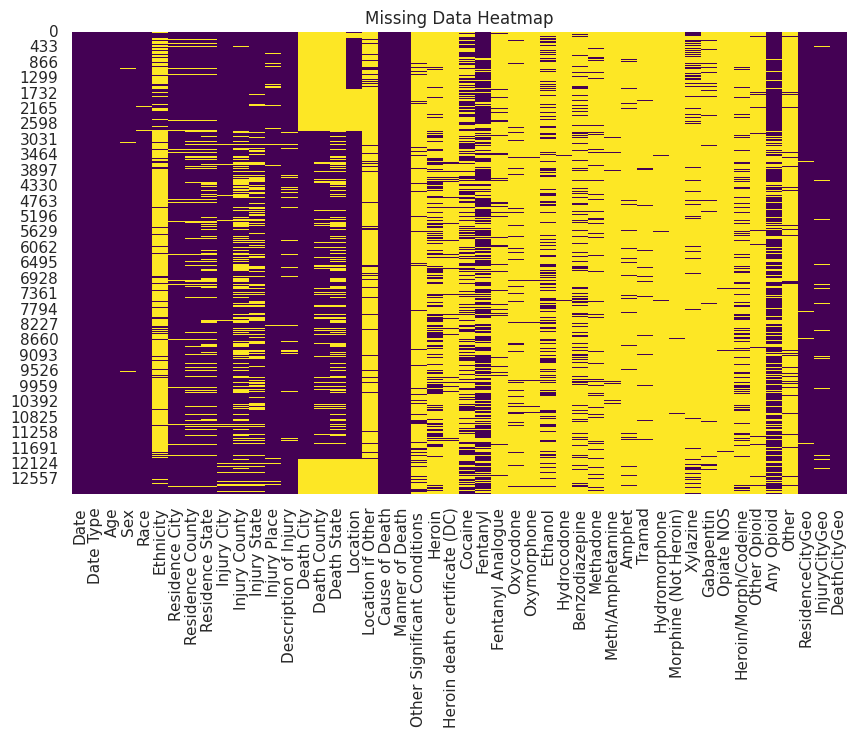

In [6]:
# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

##>>Pre-processing and cleaning

In [7]:
# Convert Date column to datetime amd extract year
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Year"] = df["Date"].dt.year

In [8]:
# Convert Age to numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [9]:
# Standardize categorical columns (e.g., Sex, Race, Ethnicity)
df['Sex'] = df['Sex'].str.strip().str.upper()
df['Race'] = df['Race'].str.strip().str.title()
df['Ethnicity'] = df['Ethnicity'].str.strip().str.title()

In [10]:
# Handle missing values: Drop rows with missing critical fields (e.g., Age, Sex, Year)
df = df.dropna(subset=['Age', 'Sex', 'Year'])

##>>Feature Engineering

In [11]:
# Substance indicators
substance_cols = ["Fentanyl", "Heroin", "Cocaine", "Oxycodone", "Methadone", "Benzodiazepine"]

for col in substance_cols:
    if col in df.columns:
        df[col] = (
            df[col].astype(str)
            .str.upper()
            .map({"Y":1, "YES":1, "1":1})
            .fillna(0)
            .astype(int)
        )

In [12]:
# Opioids Involved
opioid_cols = ["Fentanyl", "Heroin", "Oxycodone", "Methadone"]
df["Opioids_Involved"] = df[opioid_cols].max(axis=1)

In [13]:
# Multi-drog involvemente
df["Multi_Drug_Involved"] = (df[substance_cols].sum(axis=1) > 1).astype(int)

In [14]:
# Filter accidental deaths
if "Manner of Death" in df.columns:
    df = df[df["Manner of Death"].str.contains("Accident", case=False, na=False)]

##>>Remove Duplicates

In [15]:
# Remove duplicates and create a new dataset
df_clean = df.drop_duplicates()

print("Cleaned Dataset Shape:", df_clean.shape)

Cleaned Dataset Shape: (12928, 51)


##>>Handling Outliers

In [16]:
#IQR-based Outlier detection function
def iqr_bounds(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    return Q1 - 1.5*IQR, Q3 + 1.5*IQR

    lower, upper = iqr_bounds(df_clean, "Age")

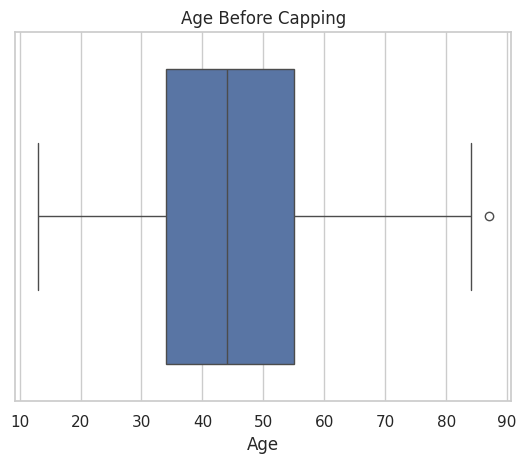

In [17]:
#Visualize before
sns.boxplot(x=df_clean["Age"])
plt.title("Age Before Capping")
plt.show()

In [18]:
#IQR-based Outlier detection function
def iqr_bounds(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    return Q1 - 1.5*IQR, Q3 + 1.5*IQR

# Cap outliers: Replace values outside bounds with the bounds
lower, upper = iqr_bounds(df_clean, "Age")
df_clean["Age"] = np.clip(df_clean["Age"], lower, upper)

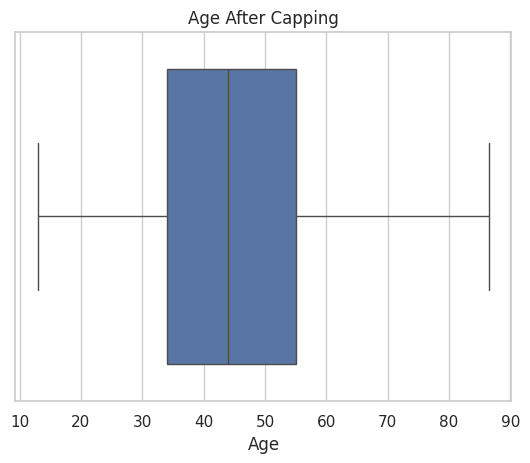

count   12928.00
mean       44.35
std        12.71
min        13.00
25%        34.00
50%        44.00
75%        55.00
max        86.50
Name: Age, dtype: float64


In [19]:
# Visualize after
sns.boxplot(x=df_clean["Age"])
plt.title("Age After Capping")
plt.show()

print(df_clean["Age"].describe())

In [20]:
# Summary stats after capping
print("Age Summary After Capping:\n", df_clean['Age'].describe())
print(f"Outliers capped: Below {lower:.1f} or above {upper:.1f}")

Age Summary After Capping:
 count   12928.00
mean       44.35
std        12.71
min        13.00
25%        34.00
50%        44.00
75%        55.00
max        86.50
Name: Age, dtype: float64
Outliers capped: Below 2.5 or above 86.5


##>>Exploratory Data Analysis (EDA)

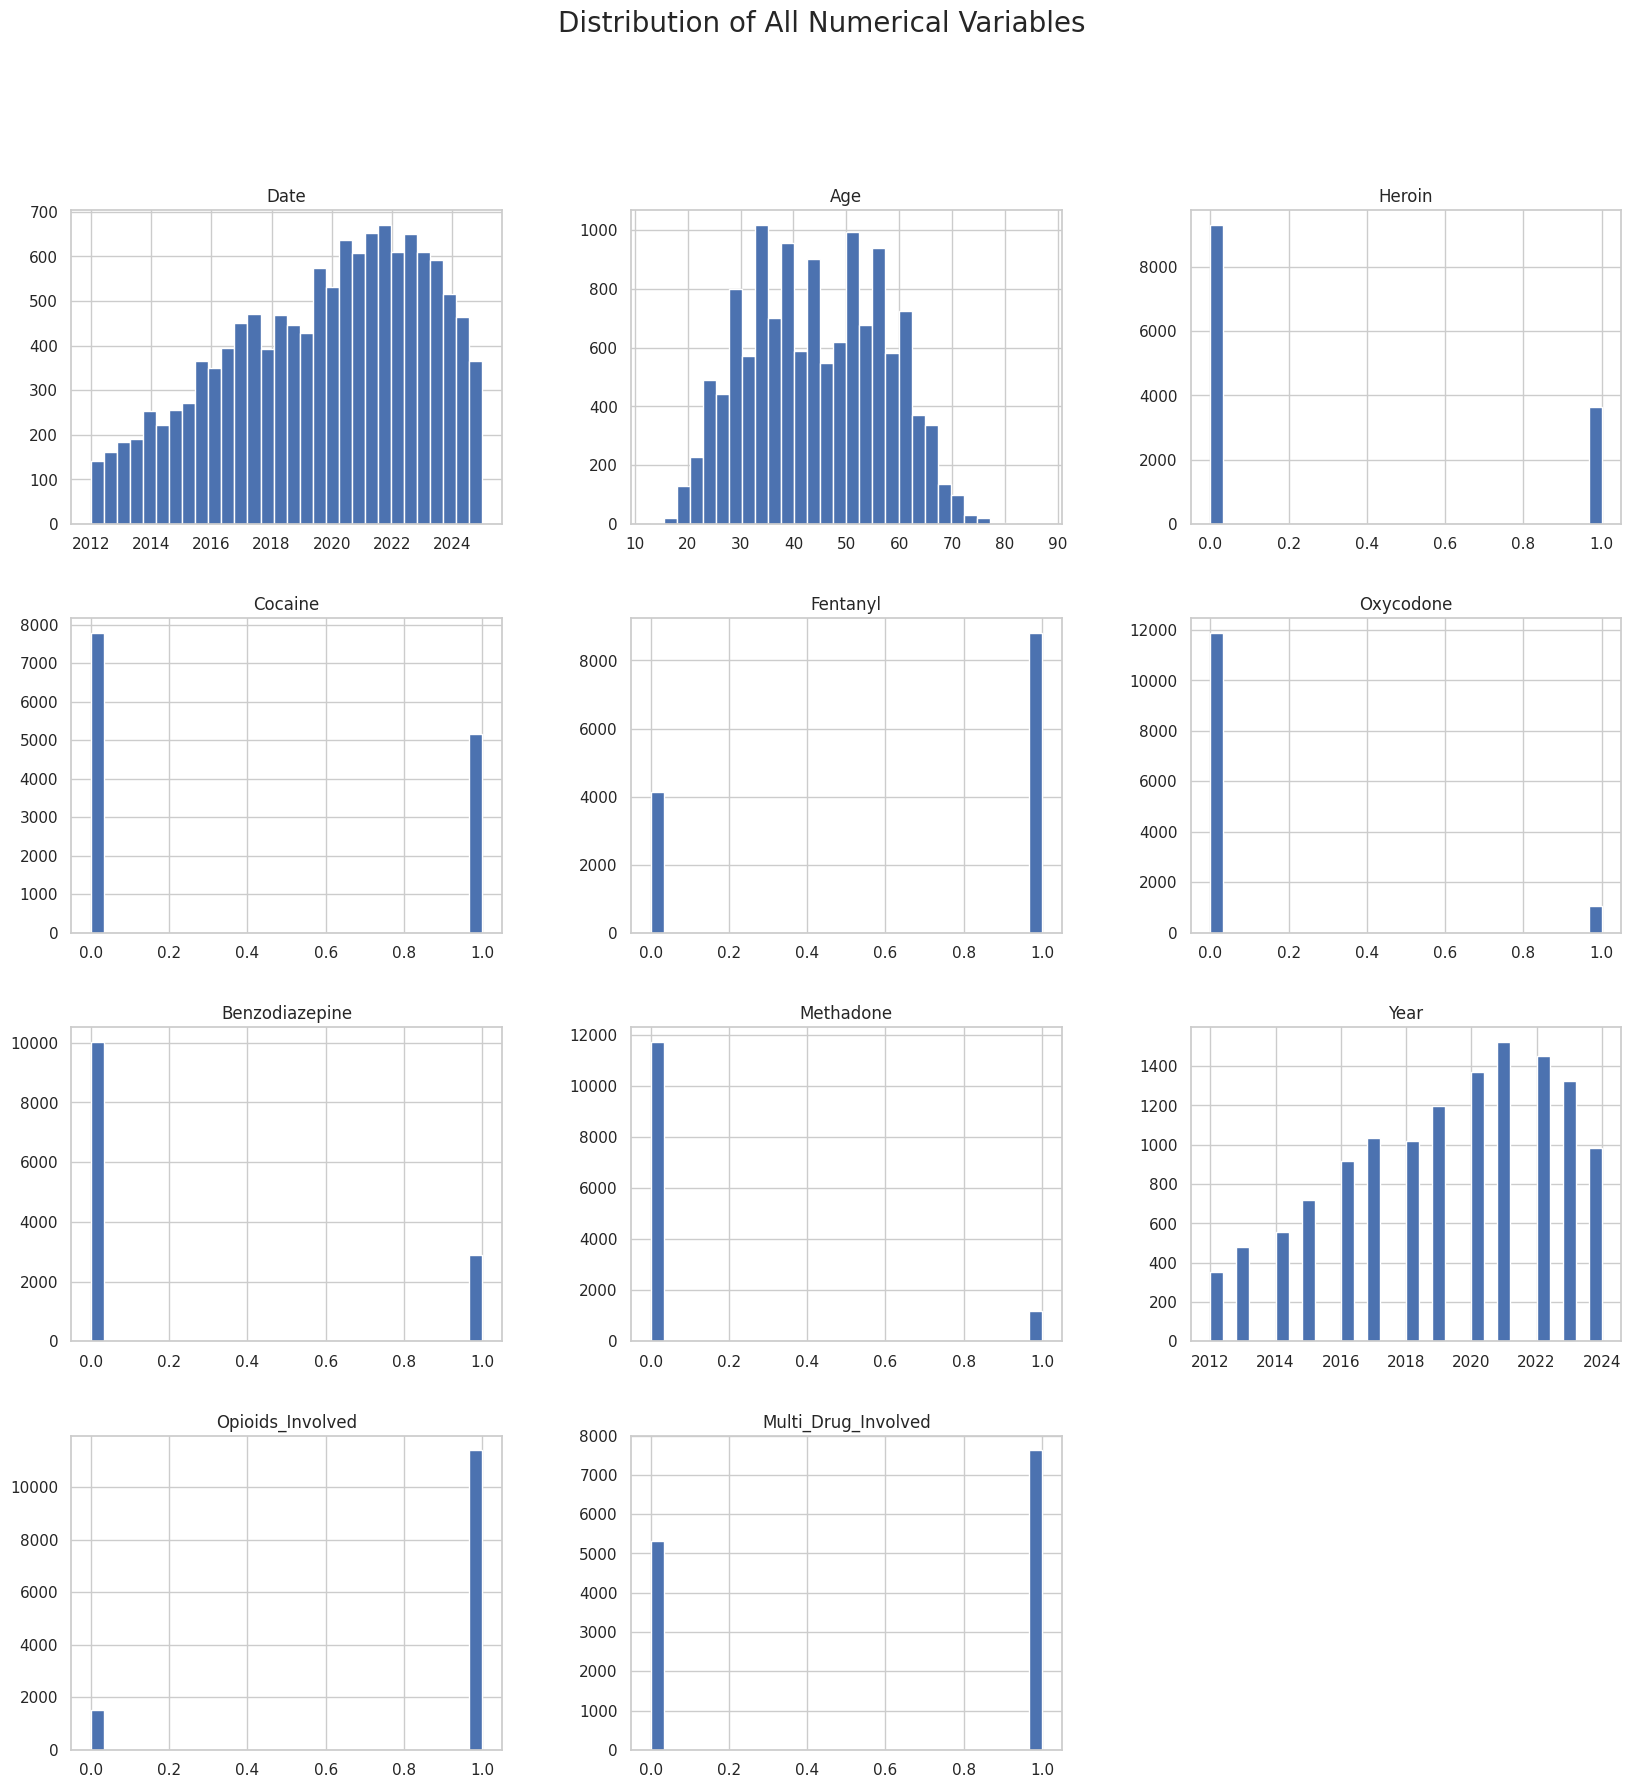

In [21]:
#Distribution of numerical variables
df.hist(figsize=(20,20), bins=30)
plt.suptitle("Distribution of All Numerical Variables", fontsize=20)
plt.show()

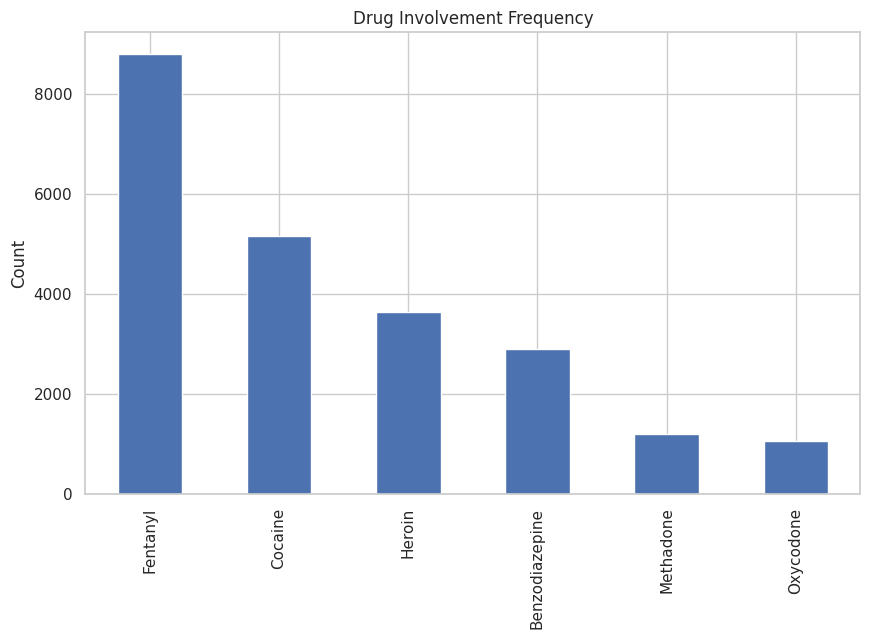

In [22]:
#Drug frequency
drug_sums = df_clean[substance_cols].sum().sort_values(ascending=False)

drug_sums.plot(kind="bar", figsize=(10,6))
plt.title("Drug Involvement Frequency")
plt.ylabel("Count")
plt.show()

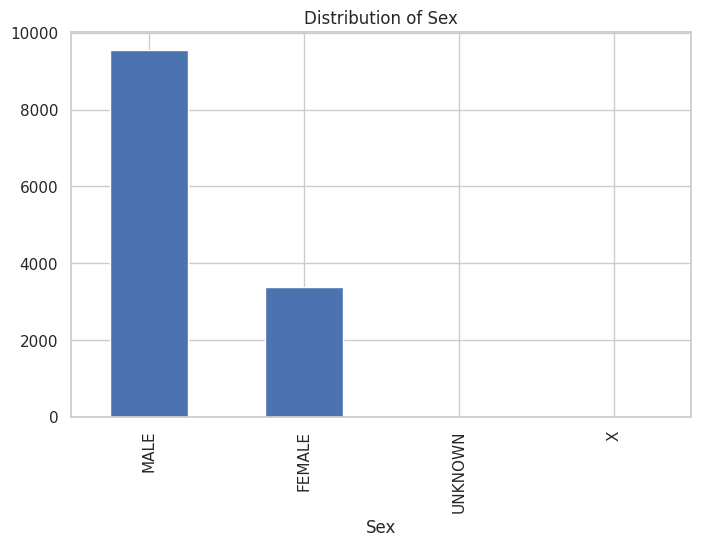

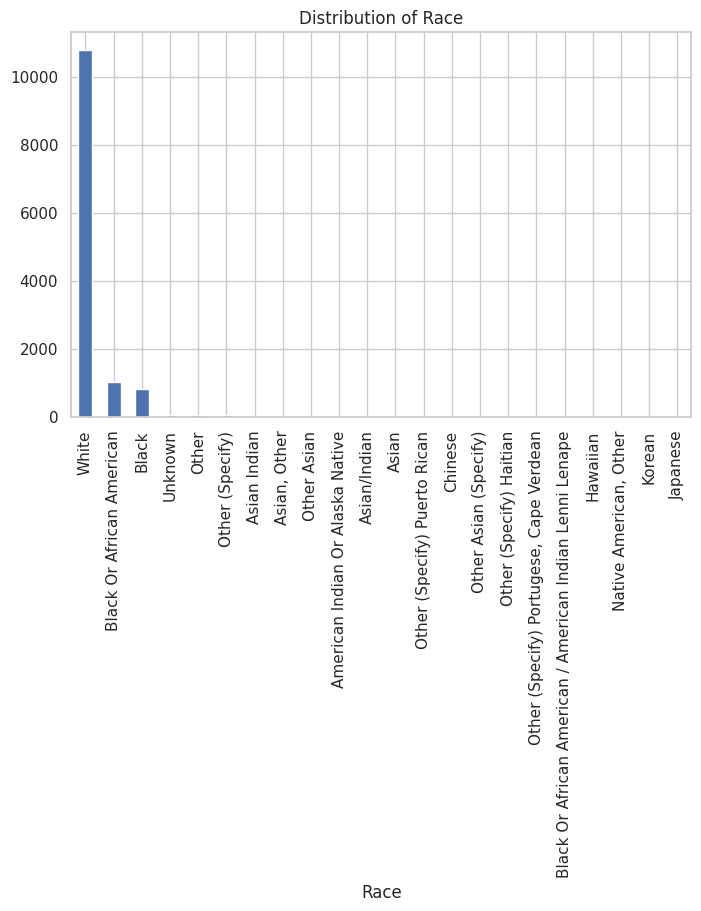

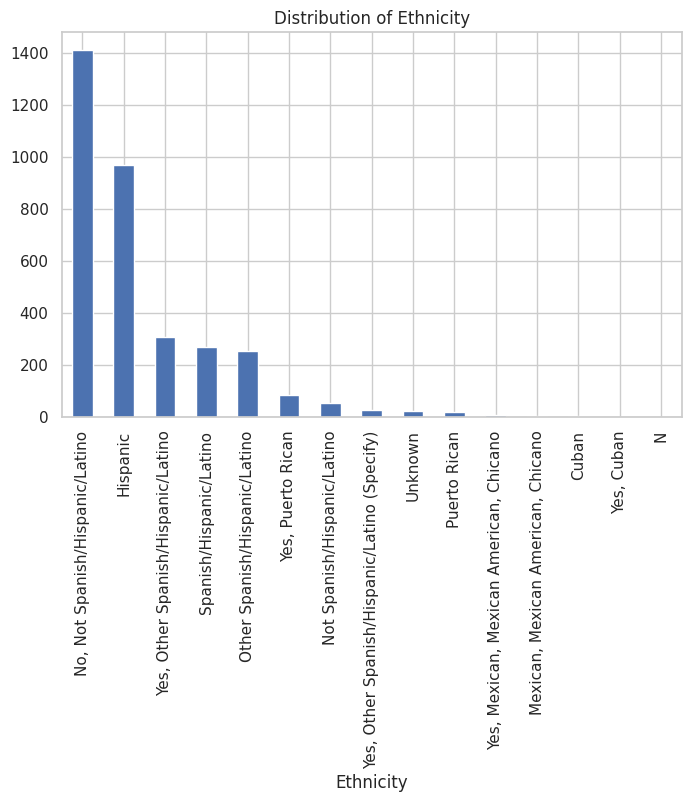

In [23]:
#Demographics
for col in ["Sex", "Race", "Ethnicity"]:
    df_clean[col].value_counts().plot(kind="bar", figsize=(8,5))
    plt.title(f"Distribution of {col}")
    plt.show()

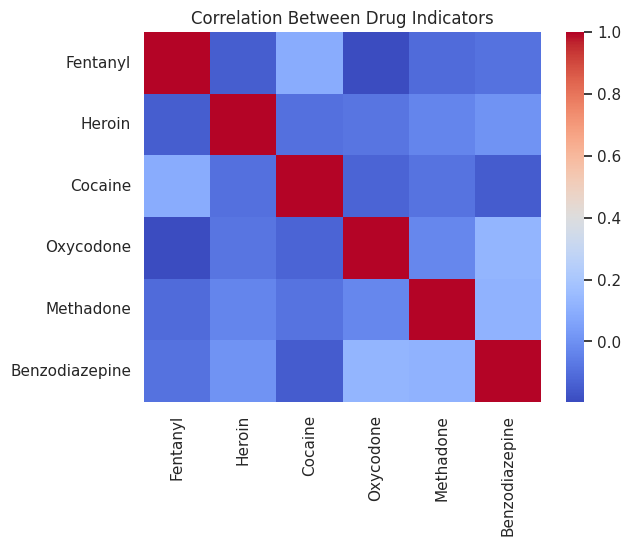

In [24]:
#Correlation heatmap
sns.heatmap(df_clean[substance_cols].corr(), cmap="coolwarm")
plt.title("Correlation Between Drug Indicators")
plt.show()

##>>Research Question and Hypothesis testing

#####>>RQs Graphs

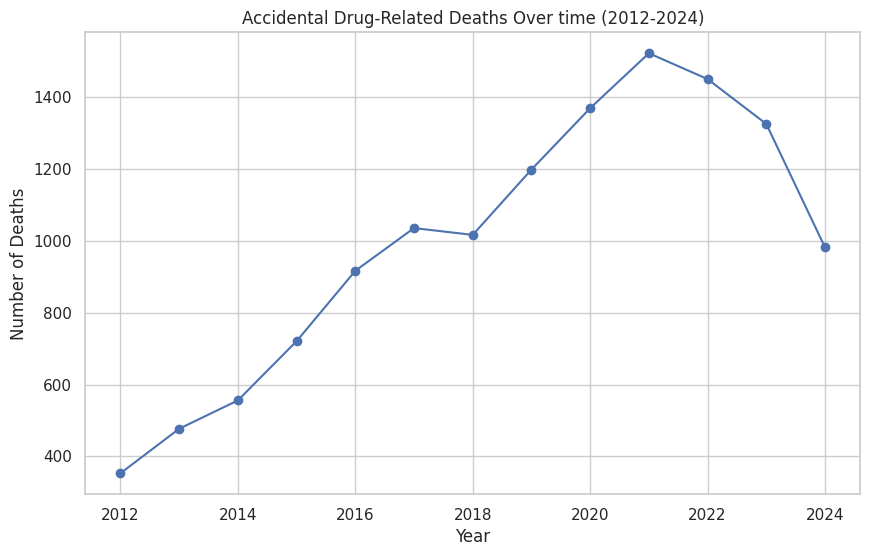

In [25]:
# RQ1: Accidental drug-related deaths changed over time.
deaths_per_year = df_clean.groupby("Year").size()
plt.figure(figsize=(10, 6))
deaths_per_year.plot(kind="line", marker="o")
plt.title("Accidental Drug-Related Deaths Over time (2012-2024)")
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.grid(True)
plt.show()

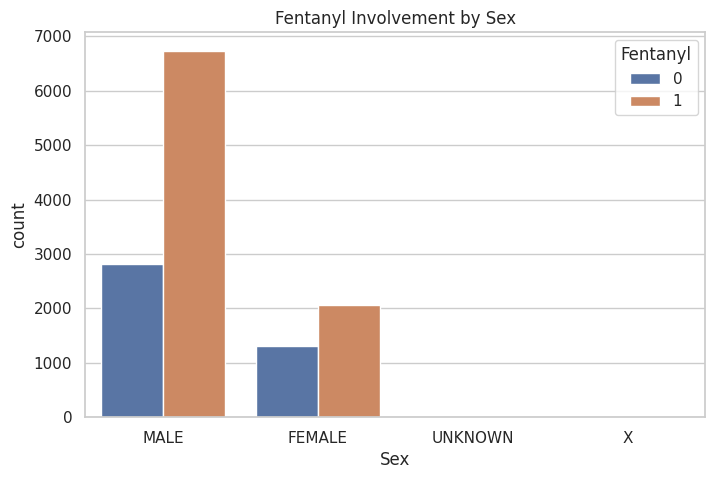

In [30]:
# RQ2: Association between sex and fentanyl involvement
plt.figure(figsize=(8, 5))
sns.countplot(data=df_clean, x="Sex", hue="Fentanyl")
plt.title("Fentanyl Involvement by Sex")
plt.show()

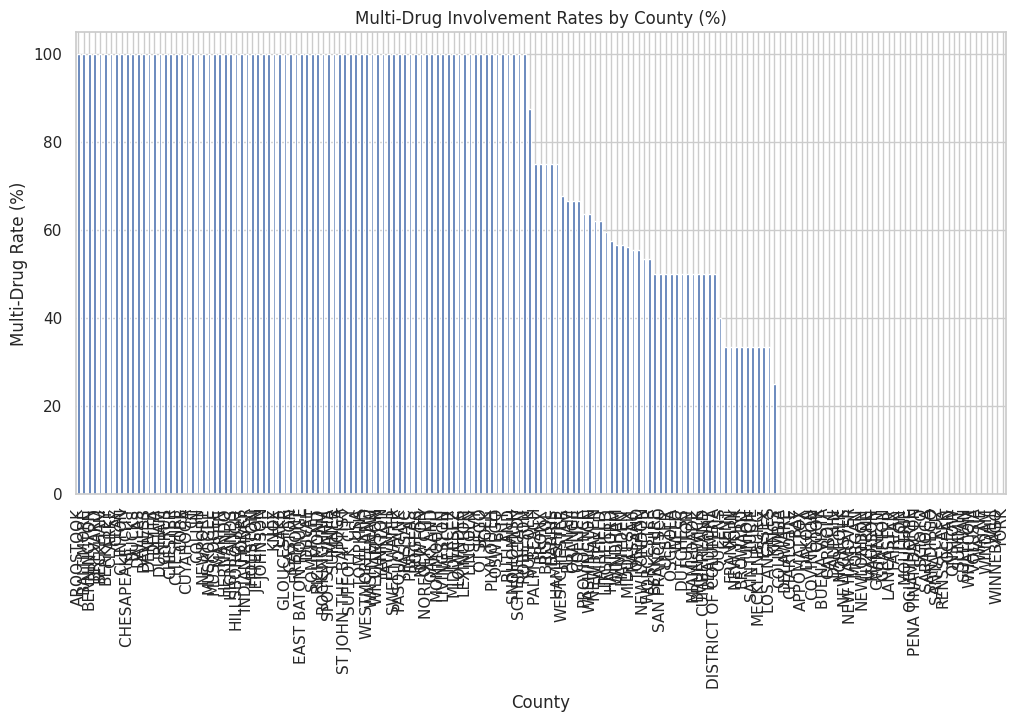

In [31]:
# RQ3: Differences in multi-drug rates across counties
county_rates = df_clean.groupby("Residence County")["Multi_Drug_Involved"].mean()*100
county_rates = county_rates.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
county_rates.plot(kind="bar")
plt.title("Multi-Drug Involvement Rates by County (%)")
plt.xlabel("County")
plt.ylabel("Multi-Drug Rate (%)")
plt.show()

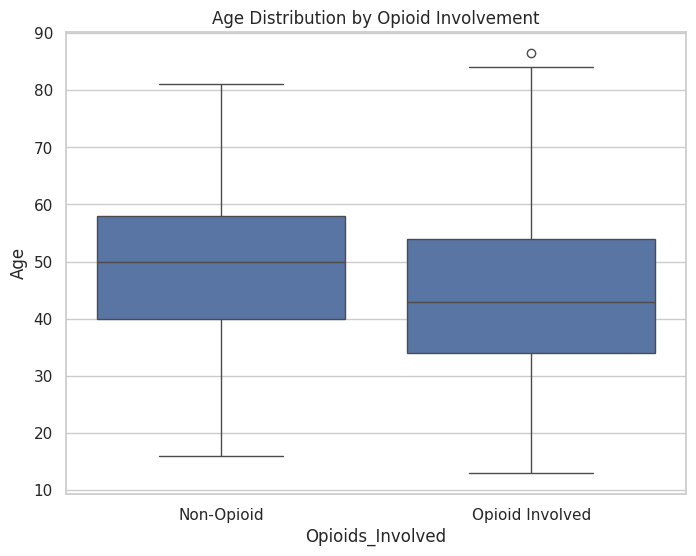

In [32]:
# RQ4: Age difference between opioid-involved and non-opioid deaths
plt.figure(figsize=(8,6))
sns.boxplot(x="Opioids_Involved", y="Age", data=df_clean)
plt.title("Age Distribution by Opioid Involvement")
plt.xticks([0, 1], ["Non-Opioid", "Opioid Involved"])
plt.show()

#####>>Hypothesis Results

In [26]:
# RQ1: Accidental drug-related deaths changed over time.
print("=== Testing RQ1 Hypothesis ===")
# H₀: Fentanyl-involved deaths has remained constant over time.
# H₁: Fentanyl-involved deaths has increased significantly over time.

# Calculate yearly proportions of fentanyl-involved deaths
df_trend = df_clean[["Year", "Fentanyl"]].dropna()
df_trend["Year_Centered"] = df_trend["Year"] - df_trend["Year"].min()

model = logit("Fentanyl ~ Year_Centered", data=df_trend).fit(disp=False)
print(model.summary())

p = model.pvalues["Year_Centered"]
print("P-value:", p)

if p < ALPHA:
    print("Reject H₀: Fentanyl involvement increased over time.")
else:
    print("Fail to reject H₀.")

=== Testing RQ1 Hypothesis ===
                           Logit Regression Results                           
Dep. Variable:               Fentanyl   No. Observations:                12928
Model:                          Logit   Df Residuals:                    12926
Method:                           MLE   Df Model:                            1
Date:                Sun, 28 Dec 2025   Pseudo R-squ.:                  0.1886
Time:                        14:20:18   Log-Likelihood:                -6572.1
converged:                       True   LL-Null:                       -8099.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.5873      0.050    -31.574      0.000      -1.686      -1.489
Year_Centered     0.3538      0.007     48.546      0.000       0.339       0.368
P-value: 

In [27]:
# RQ2: Association between sex and fentanyl involvement

print("=== Testing RQ2 Hypothesis ===")
# H₀: No association between sex and fentanyl involvement
# H₁: Significant association exists

for demo in ["Sex", "Race", "Ethnicity"]:
    table = pd.crosstab(df_clean[demo], df_clean["Fentanyl"])
    chi2, p, dof, expected = chi2_contingency(table)
    print(f"{demo}: χ²={chi2:.2f}, p={p:.4f}")

=== Testing RQ2 Hypothesis ===
Sex: χ²=108.92, p=0.0000
Race: χ²=191.74, p=0.0000
Ethnicity: χ²=194.36, p=0.0000


In [28]:
# RQ3: Differences in multi-drug rates across counties

print("\n=== Testing RQ3 Hypothesis ===")
# H₀: Rates of multi-drug involvement are the same across counties
# H₁: Rates differ significantly by county

table = pd.crosstab(df_clean["Residence County"], df_clean["Multi_Drug_Involved"])
chi2, p, dof, expected = chi2_contingency(table)
print(f"County vs Multi-drug: χ²={chi2:.2f}, p={p:.4f}")


=== Testing RQ3 Hypothesis ===
County vs Multi-drug: χ²=199.17, p=0.0624


In [29]:
# RQ4: Age difference between opioid-involved and non-opioid deaths

print("\n=== Testing RQ4 Hypothesis ===")
# H₀: No significant difference in age between opioid-involved and non-opioid deaths
# H₁: Significant difference exists

opioid = df_clean[df_clean["Opioids_Involved"] == 1]["Age"]
non_opioid = df_clean[df_clean["Opioids_Involved"] == 0]["Age"]

t, p = ttest_ind(opioid, non_opioid, equal_var=False)
print(f"T={t:.2f}, p={p:.4f}")

if p < ALPHA:
    print("Reject H₀: Significant age difference.")
else:
    print("Fail to reject H₀.")

# Effect size
cohens_d = (opioid.mean() - non_opioid.mean()) / np.sqrt((opioid.var() + non_opioid.var()) / 2)
print("Cohen's d:", cohens_d)


=== Testing RQ4 Hypothesis ===
T=-14.92, p=0.0000
Reject H₀: Significant age difference.
Cohen's d: -0.39886093009237766
